<a href="https://colab.research.google.com/github/shsaniya04/Machine-Learning-Projects/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/housepriceprediction.zip')

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#Displays the first 5 rows of the DataFrame.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Displays the last 5 rows of the DataFrame
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
#Returns the number of rows and columns as a tuple.
df.shape


(21613, 21)

In [ ]:
#Generates descriptive statistics for numerical columns.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# checking for null values
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
#Provides a concise summary of the DataFrame, including data types, non-null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
x = df.drop(['id','price','date','bedrooms', 'bathrooms', 'sqft_living15', 'lat', 'long','waterfront','view','yr_built','yr_renovated','grade','zipcode','sqft_above','sqft_basement','condition',], axis=1)
y = df['price']
df1 = df.drop(['id','date', 'lat', 'long','waterfront','view','yr_built','yr_renovated'], axis=1)

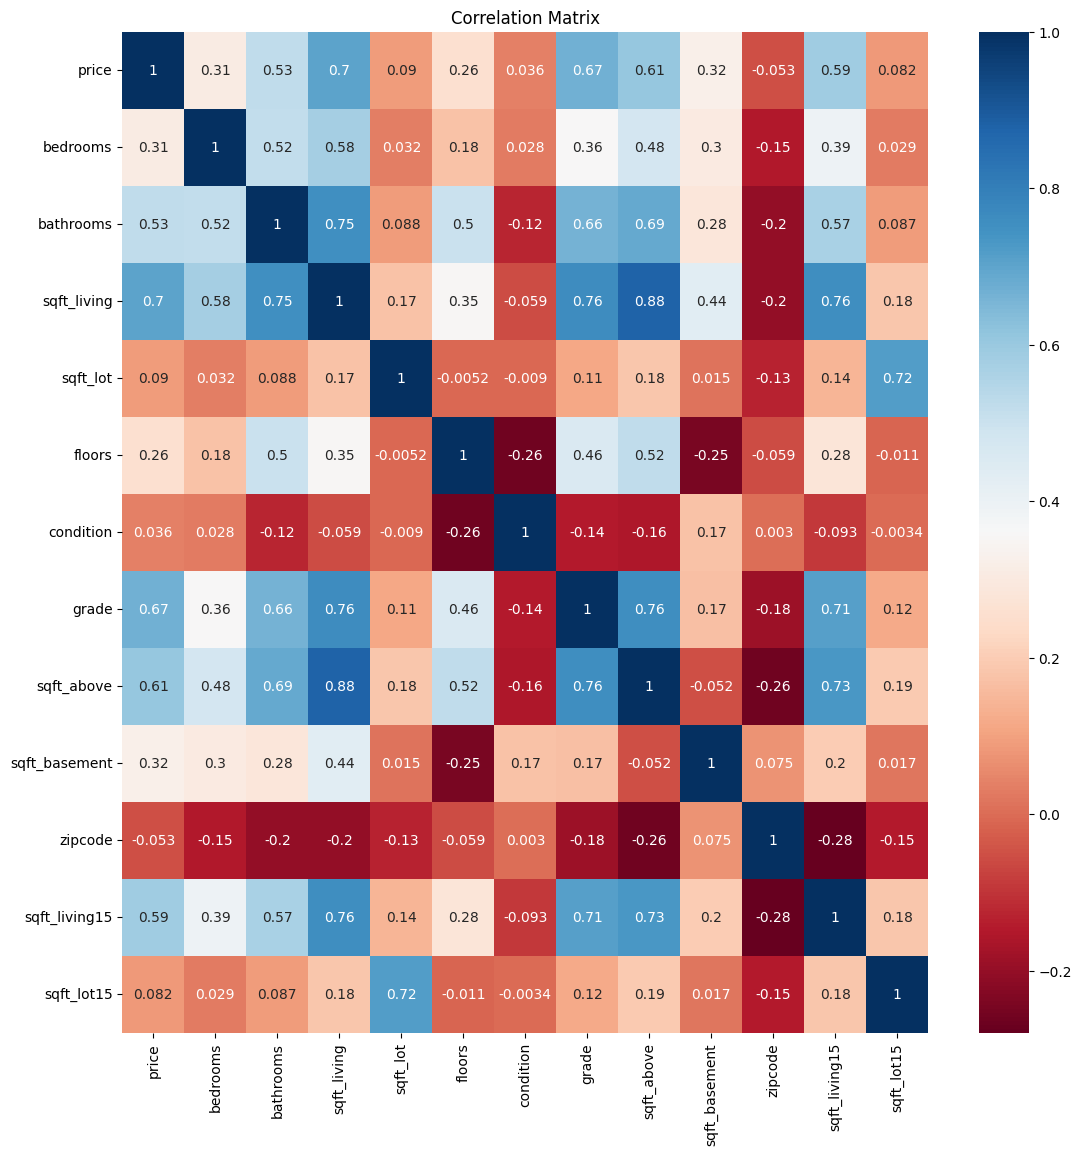

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(df1.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

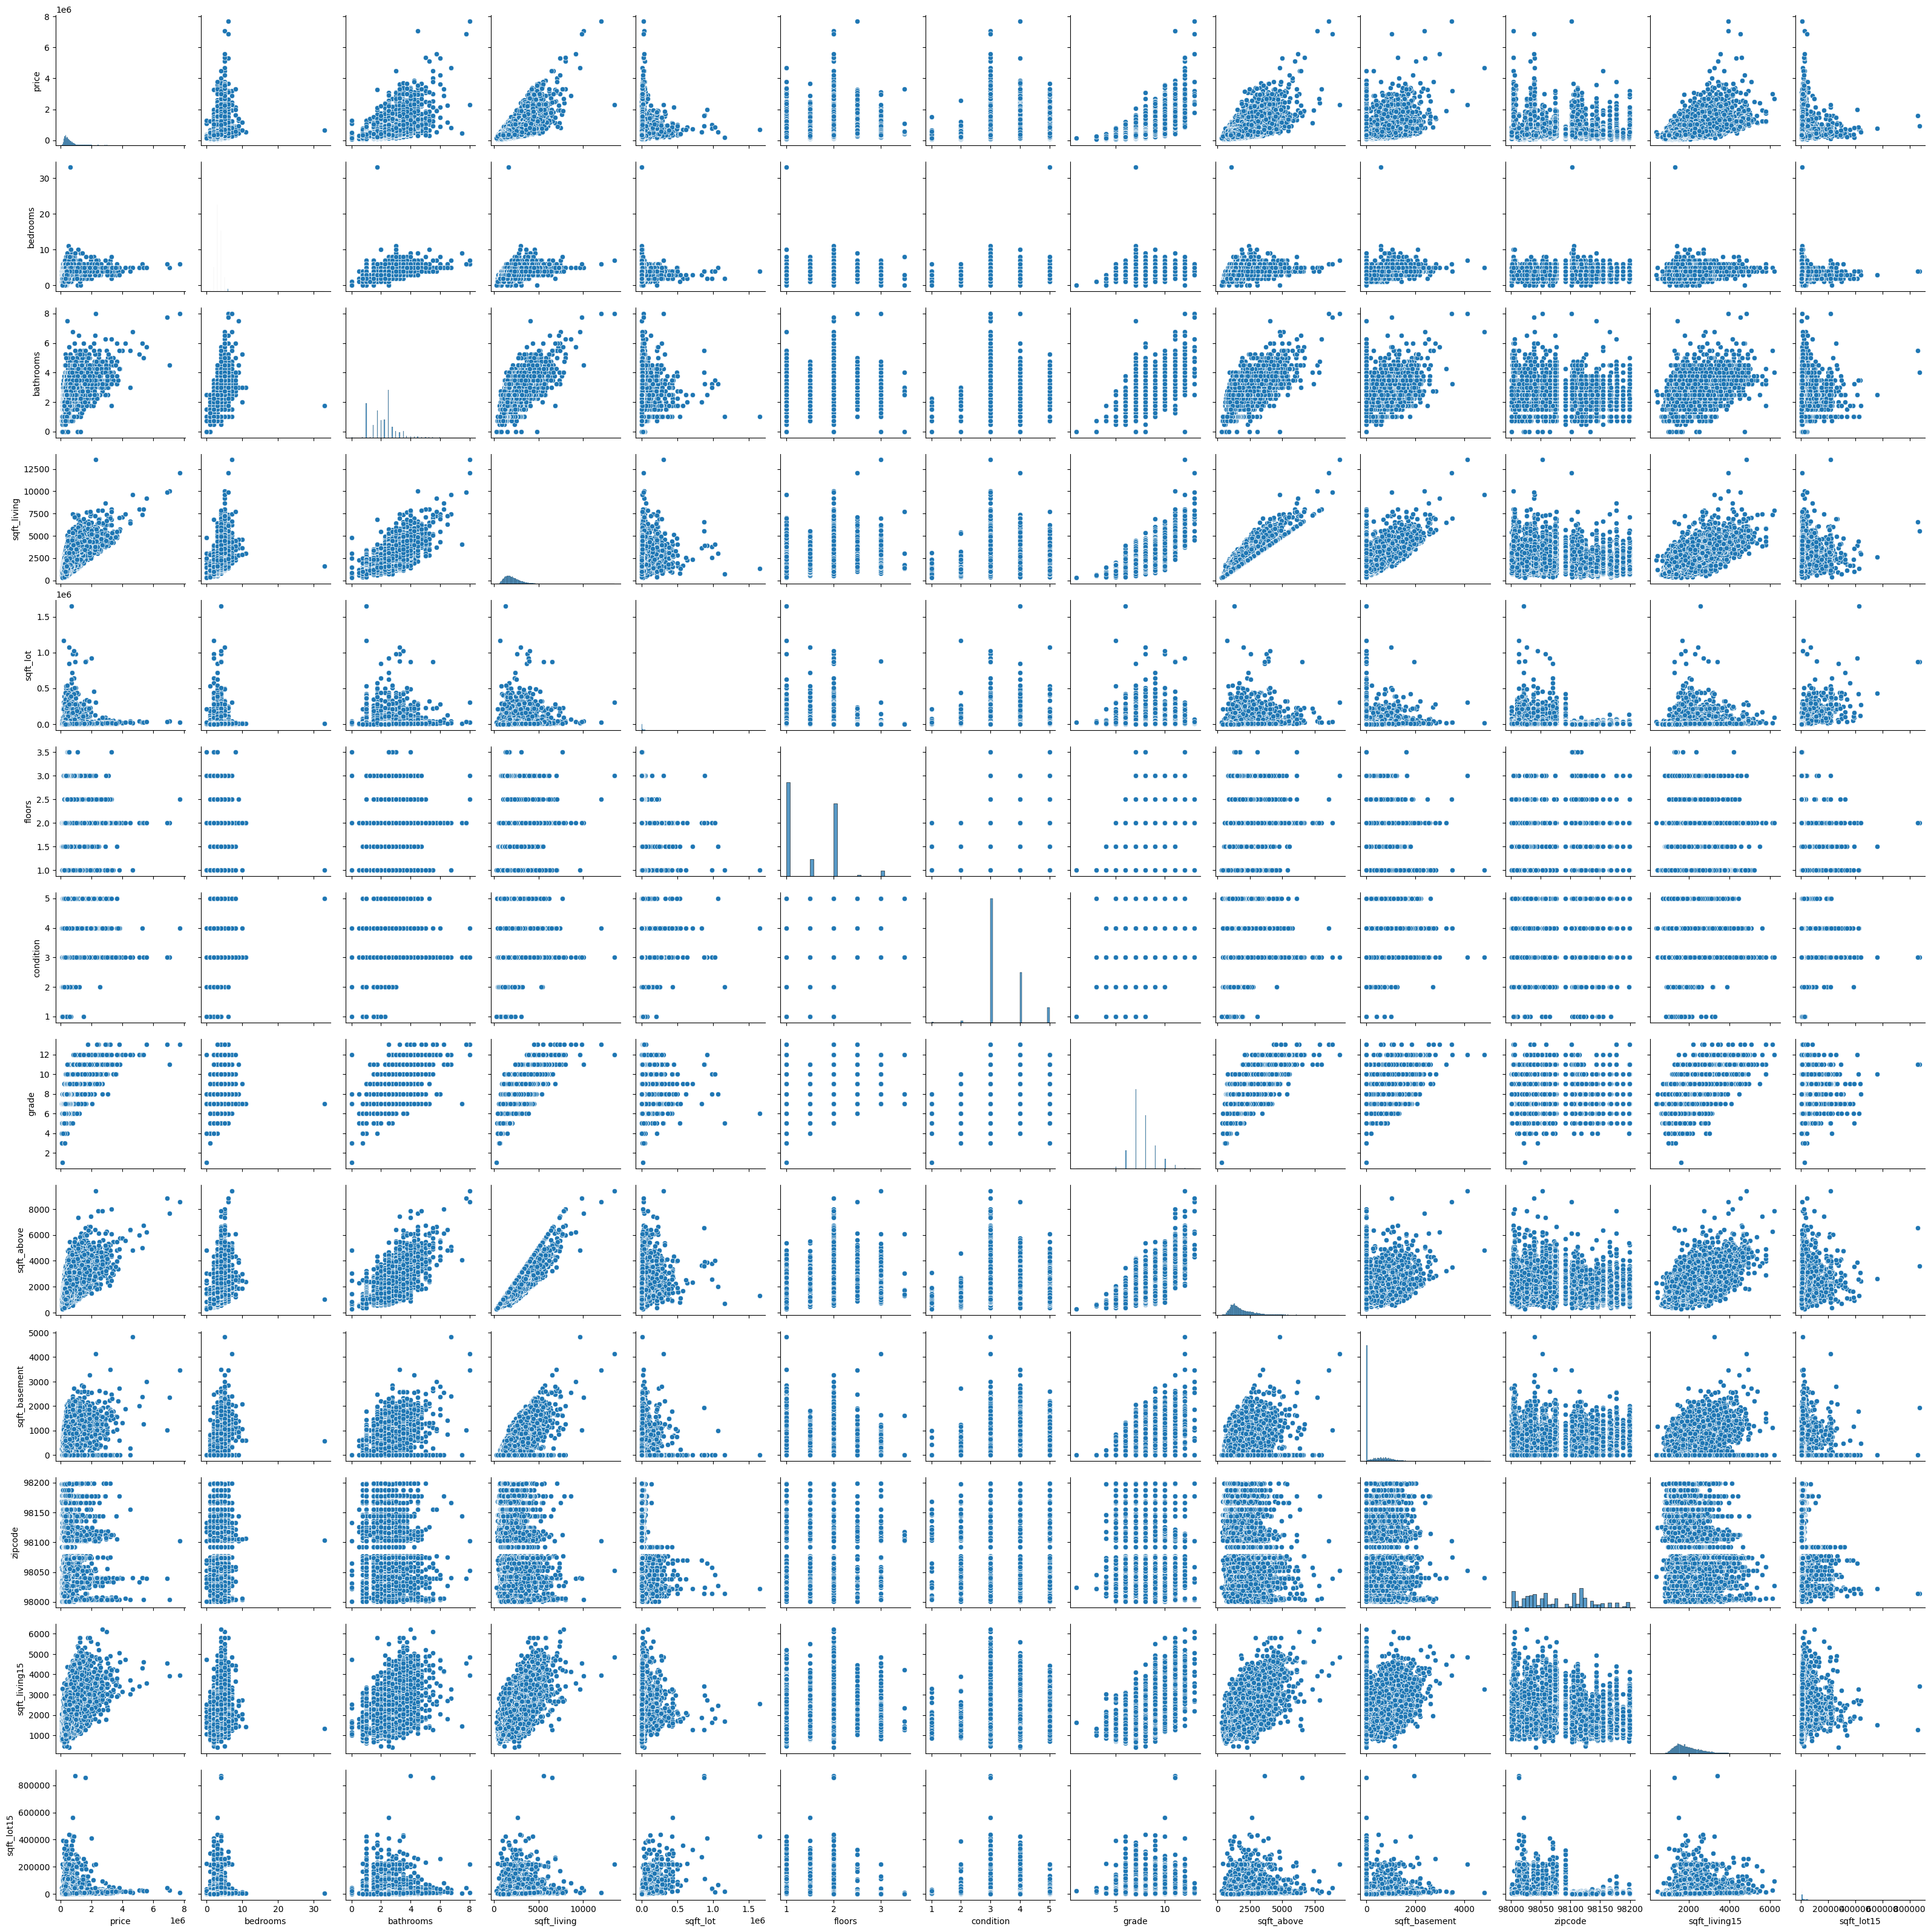

In [ ]:
sns.pairplot(df1)
plt.show()

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor (x.values, i)
for i in range(len(x.columns))]
print(vif_data)

       feature       VIF
0  sqft_living  6.157647
1     sqft_lot  2.351280
2       floors  5.774544
3   sqft_lot15  2.534288


In [ ]:
print(x.columns)

Index(['sqft_living', 'sqft_lot', 'floors', 'sqft_lot15'], dtype='object')


<ipython-input-84-1bc959231168>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_living'])


<Axes: xlabel='sqft_living', ylabel='Density'>

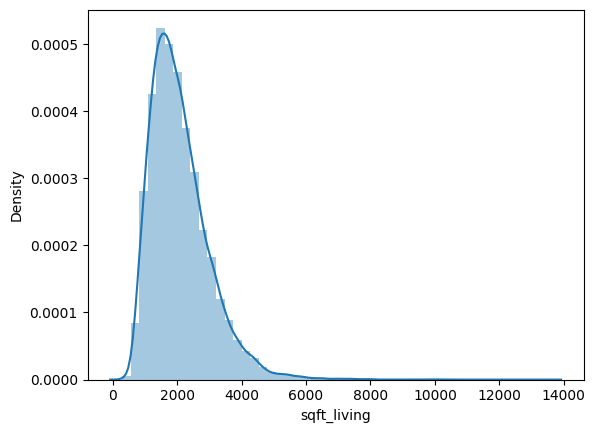

In [ ]:
sns.distplot(df['sqft_living'])

<ipython-input-87-76359df94136>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_lot'])


<Axes: xlabel='sqft_lot', ylabel='Density'>

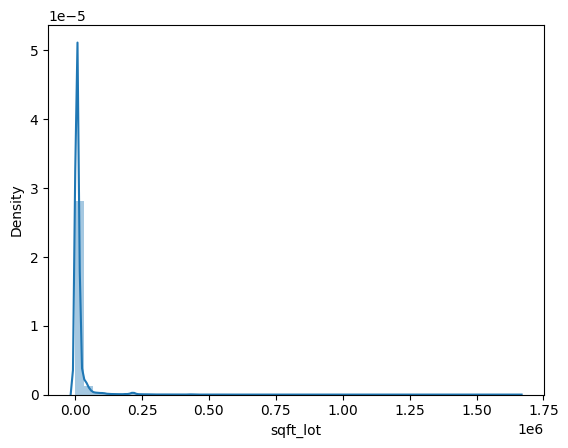

In [ ]:
sns.distplot(df['sqft_lot'])

<ipython-input-89-a110325d1e0d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqft_lot15'])


<Axes: xlabel='sqft_lot15', ylabel='Density'>

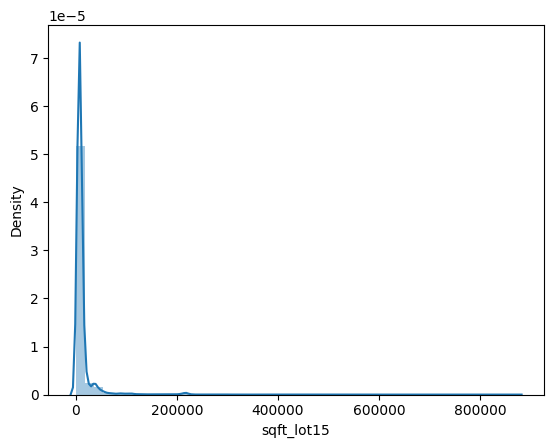

In [ ]:
sns.distplot(df['sqft_lot15'])

<ipython-input-88-76ae4e245407>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['floors'])


<Axes: xlabel='floors', ylabel='Density'>

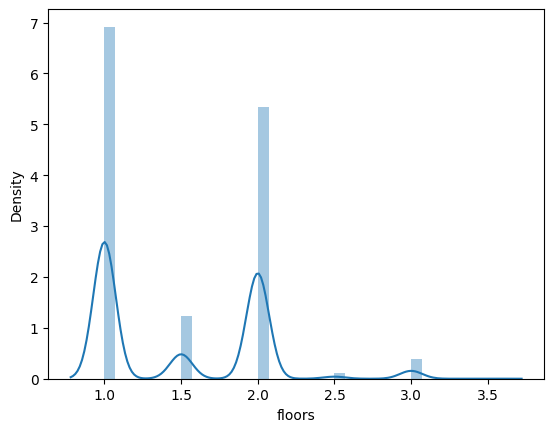

In [ ]:
sns.distplot(df['floors'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# normalizing the data using Standard Scaler(zero mean, unit variance scaling)
scaler = StandardScaler()
# fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# transform the test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.39526335, -0.47445144, -0.32393262, ...,  0.44228847,
         1.12607326,  0.01344043],
       [-1.46896378, -1.45258323, -1.18365301, ..., -0.53995821,
        -1.04652268, -0.28066159],
       [-0.39526335, -1.45258323, -1.09547656, ..., -0.86025604,
        -1.19331971, -0.1789339 ],
       ...,
       [-0.39526335,  0.50368036,  0.05081729, ...,  1.29641601,
        -0.42997519, -0.36604019],
       [-2.54266422, -1.77862716, -1.8670205 , ..., -0.77484328,
        -1.19331971,  0.08265159],
       [ 0.67843709,  0.50368036,  1.16404497, ...,  0.81952813,
         1.52242522, -0.24443927]])

In [ ]:
X_test_scaled

array([[ 0.67843709,  0.17763643, -0.00429299, ...,  0.37111117,
         0.59760397, -0.18256703],
       [ 1.75213752,  1.15576822,  0.91053768, ..., -0.50436956,
         0.56824457, -0.23404851],
       [ 0.67843709,  0.50368036,  1.86945657, ...,  0.60599625,
         2.53532468, -0.11044936],
       ...,
       [ 0.67843709,  0.50368036,  0.39690986, ..., -0.4901341 ,
         0.66219466, -0.30246038],
       [ 0.67843709, -0.47445144,  0.19410402, ...,  0.68429127,
         0.0984941 , -0.10808783],
       [ 0.67843709,  0.50368036,  0.54680982, ..., -0.58266459,
         0.65632278, -0.24443927]])

In [ ]:
# Creating and training the Linear Regresion Model
model = LinearRegression()
# Train the model on the scaled data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predicting the target values for both training and testing sets
# Predictions for training set
# y_pred_train model.predict(X_train_scaled)
# Predictions for test set
y_pred_test = model.predict(X_test_scaled)

In [ ]:
# Calculating R-squared scores (how well the model explains the variance in data)
r2_test = r2_score(y_test, y_pred_test) #R-squared for test set

In [ ]:
# Calculating Root Mean Squared Error (RMSE) for the test set
mse_test = mean_squared_error(y_test, y_pred_test)  # Mean squared error
rmse_test = mse_test ** 0.5  # Root mean squared error

In [ ]:
#Printing the performance metrics
print("R-squared:", r2_test)
print("Root Mean Squared Error:", rmse_test)

R-squared: 0.7011904448878412
Root Mean Squared Error: 212539.51663817756


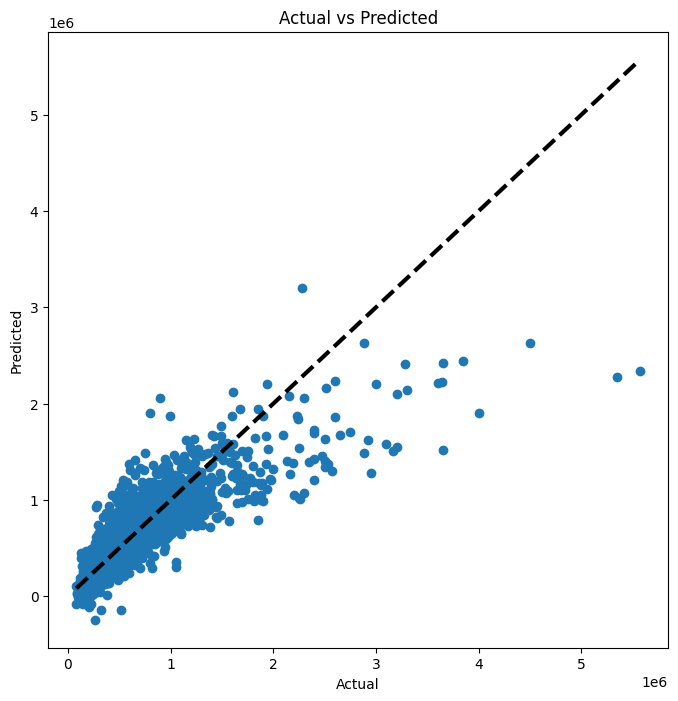

In [ ]:
#Plotting Residual (actual vs predicted values)
plt.figure(figsize=(8, 8))
plt.scatter (y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
model.intercept_

537768.0479467959

In [ ]:
model.coef_

array([-31978.58324666,  34170.64740325,  80144.32815078,   3450.66466526,
         3801.31859972,  47457.6040034 ,  40859.88011873,  15983.53629513,
       110674.78779944,  74521.83743949,  26179.5650669 , -78907.76799812,
         8135.46077341, -29448.64012297,  82498.66055167, -27338.17336913,
        14451.47195385,  -8968.34709633])

In [ ]:
model.score(X_train_scaled,y_train)

0.6991021854487472

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
#LinearRegression mean cross-validation
lm=LinearRegression()
lm.fit(X_train, y_train)
cv=cross_val_score(lm, X_train,y_train,cv=5)
print('LinearRegression')
print(mean(cv))

LinearRegression
0.69787948894464


In [ ]:
#RandomForestRegressor mean cross-validation
rf=RandomForestRegressor(random_state = 1)
rf.fit(X_train, y_train)
cv = cross_val_score(rf, X_train_scaled, y_train, cv=5)
print('Random Forest Regressor')
print(mean (cv))

Random Forest Regressor
0.877214389362076


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_dtr = dtr.predict(X_test)
r2_score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",r2_score_dtr,"%")

R2 Score :  77.09 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_score_rf = round(r2_score(y_pred_rf,y_test) * 100, 2)
print('R2 Score : ',r2_score_rf,'%')

R2 Score :  83.76 %
